In [1]:
import cv2
import numpy as np
from IPython.display import Image
from io import BytesIO
from PIL import Image as PILImage

#### метод для работы с камерой

taked photo


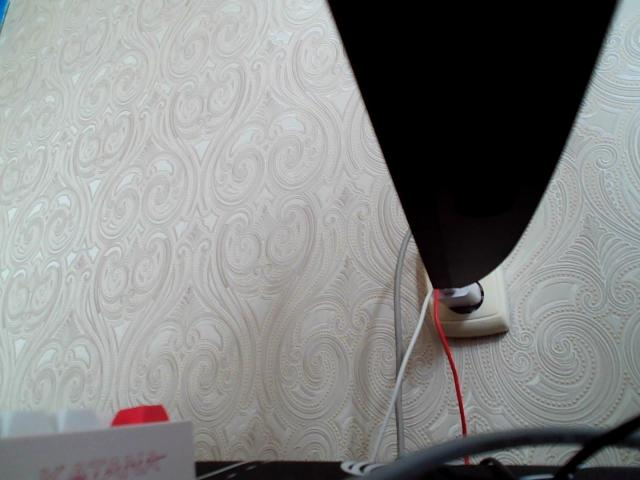

In [2]:
#принцип работы
camera = cv2.VideoCapture(0)
cv2.namedWindow("photo booth")

while True:
    ret, frame = camera.read()
    cv2.imshow("Press space to take photo", frame)

    k = cv2.waitKey(1)
    if k%256 == 32:
        # SPACE pressed
        pil_im = PILImage.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        buffer = BytesIO()
        pil_im.save(buffer, format="JPEG")
        print("taked photo")
        break

camera.release()
cv2.destroyAllWindows()
Image(data=buffer.getvalue())

In [3]:
#ф-ия для получения фото с вебки
def get_photo() -> np.ndarray:
    camera = cv2.VideoCapture(0)
    cv2.namedWindow("photo booth")
    
    while True:
        ret, frame = camera.read()
        cv2.imshow("Press space to take photo", frame)
    
        k = cv2.waitKey(1)
        if k%256 == 32:
            # SPACE pressed
            break
    
    camera.release()
    cv2.destroyAllWindows()
    
    return frame

In [4]:
get_photo()

array([[[173,  85,   0],
        [177,  88,   0],
        [173,  95,   0],
        ...,
        [200, 195, 175],
        [202, 196, 174],
        [201, 194, 173]],

       [[173,  85,   0],
        [176,  87,   0],
        [175,  93,   0],
        ...,
        [195, 197, 178],
        [196, 195, 177],
        [196, 195, 177]],

       [[170,  88,   0],
        [172,  89,   0],
        [169,  96,   0],
        ...,
        [196, 196, 175],
        [196, 196, 175],
        [196, 196, 175]],

       ...,

       [[104, 104, 104],
        [104, 104, 104],
        [106, 103, 104],
        ...,
        [ 18,  13,  14],
        [ 19,  14,  15],
        [ 18,  13,  14]],

       [[101, 107, 102],
        [101, 107, 102],
        [105, 107, 100],
        ...,
        [ 19,  12,  13],
        [ 19,  12,  13],
        [ 19,  12,  13]],

       [[101, 108, 100],
        [100, 107,  99],
        [104, 106,  99],
        ...,
        [ 14,  14,  14],
        [ 20,  16,  16],
        [ 18,  13,  14]]

#### работа с моделью, демонстрация работы

In [46]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from ultralytics import YOLO

model = YOLO("yolov8l.pt")

In [176]:
def take_photo_bboxs(model, filename='result.jpg'):
    img = get_photo()
    results = model(img)
    for result in results:
        result.save(filename=filename)
        
    return filename


0: 480x640 1 backpack, 1 suitcase, 1 couch, 1 cell phone, 31.4ms
Speed: 1.8ms preprocess, 31.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


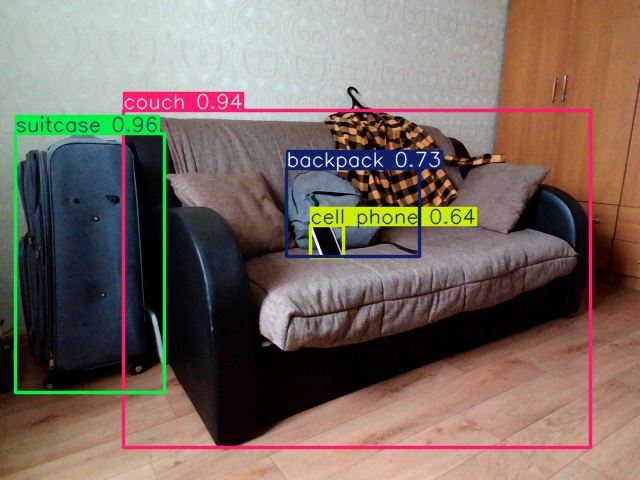

In [179]:
Image(take_photo_bboxs(model))